# Measuring Disparities

`measure_disparity.py` takes as input a [pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) containing the following observations:
    - model predictions and probabilities
    - binary outcomes
    - demographics
    

## run measure_disparity.py on model output

To run `measure_disparity.py` on the dataframe, you may use the command line interface, as shown below. 
It is also possible to import the underlying function like so:

```python
from measure_disparity import measure_disparity
```

And then call the function. See the [API](https://cavalab.org/interfair/api.html) for a full specification of options and requirements. 

Below, we demonstrate how to run `measure_disparity.py` from the command line using a model trained to predict risk of admission to the emergency department using the freely available [MIMIC-IV repository](https://www.nature.com/articles/s41597-022-01899-x). 

In [1]:
%run ../measure_disparity.py --dataset ../base_model_mimic4_admission.csv 

reading in ../base_model_mimic4_admission.csv
demographic columns: ['insurance', 'ethnicity', 'gender']
Overall Performance
	Measures of predictive bias on the whole population.
╭─────────┬─────────┬───────────────────┬───────┬───────┬────────────╮
│   AUROC │   AUPRC │   Positivity Rate │   FPR │   FNR │   Accuracy │
├─────────┼─────────┼───────────────────┼───────┼───────┼────────────┤
│   0.881 │    0.77 │             0.299 │  0.08 │ 0.409 │      0.823 │
╰─────────┴─────────┴───────────────────┴───────┴───────┴────────────╯
Subgroup Fairness Violations
	Measures the deviation in performance for marginal and intersectional groups.
	Note that these deviation are weighted by group prevalence to produce stable estimates when sample sizes are small.
╭─────────────┬───────────────────────────────┬──────────┬─────────────────────┬─────────┬─────────┬───────────────────╮
│   insurance │                     ethnicity │   gender │   Brier Score (MSE) │     FNR │     FPR │   Positivity Rate │


## Visualizing results

Running `measure_disparity.py` produces a `df_fairness.csv` file containing the resultant fairness metrics. Below, we show how to use this to generate additional figures for assessing model performance and bias. 

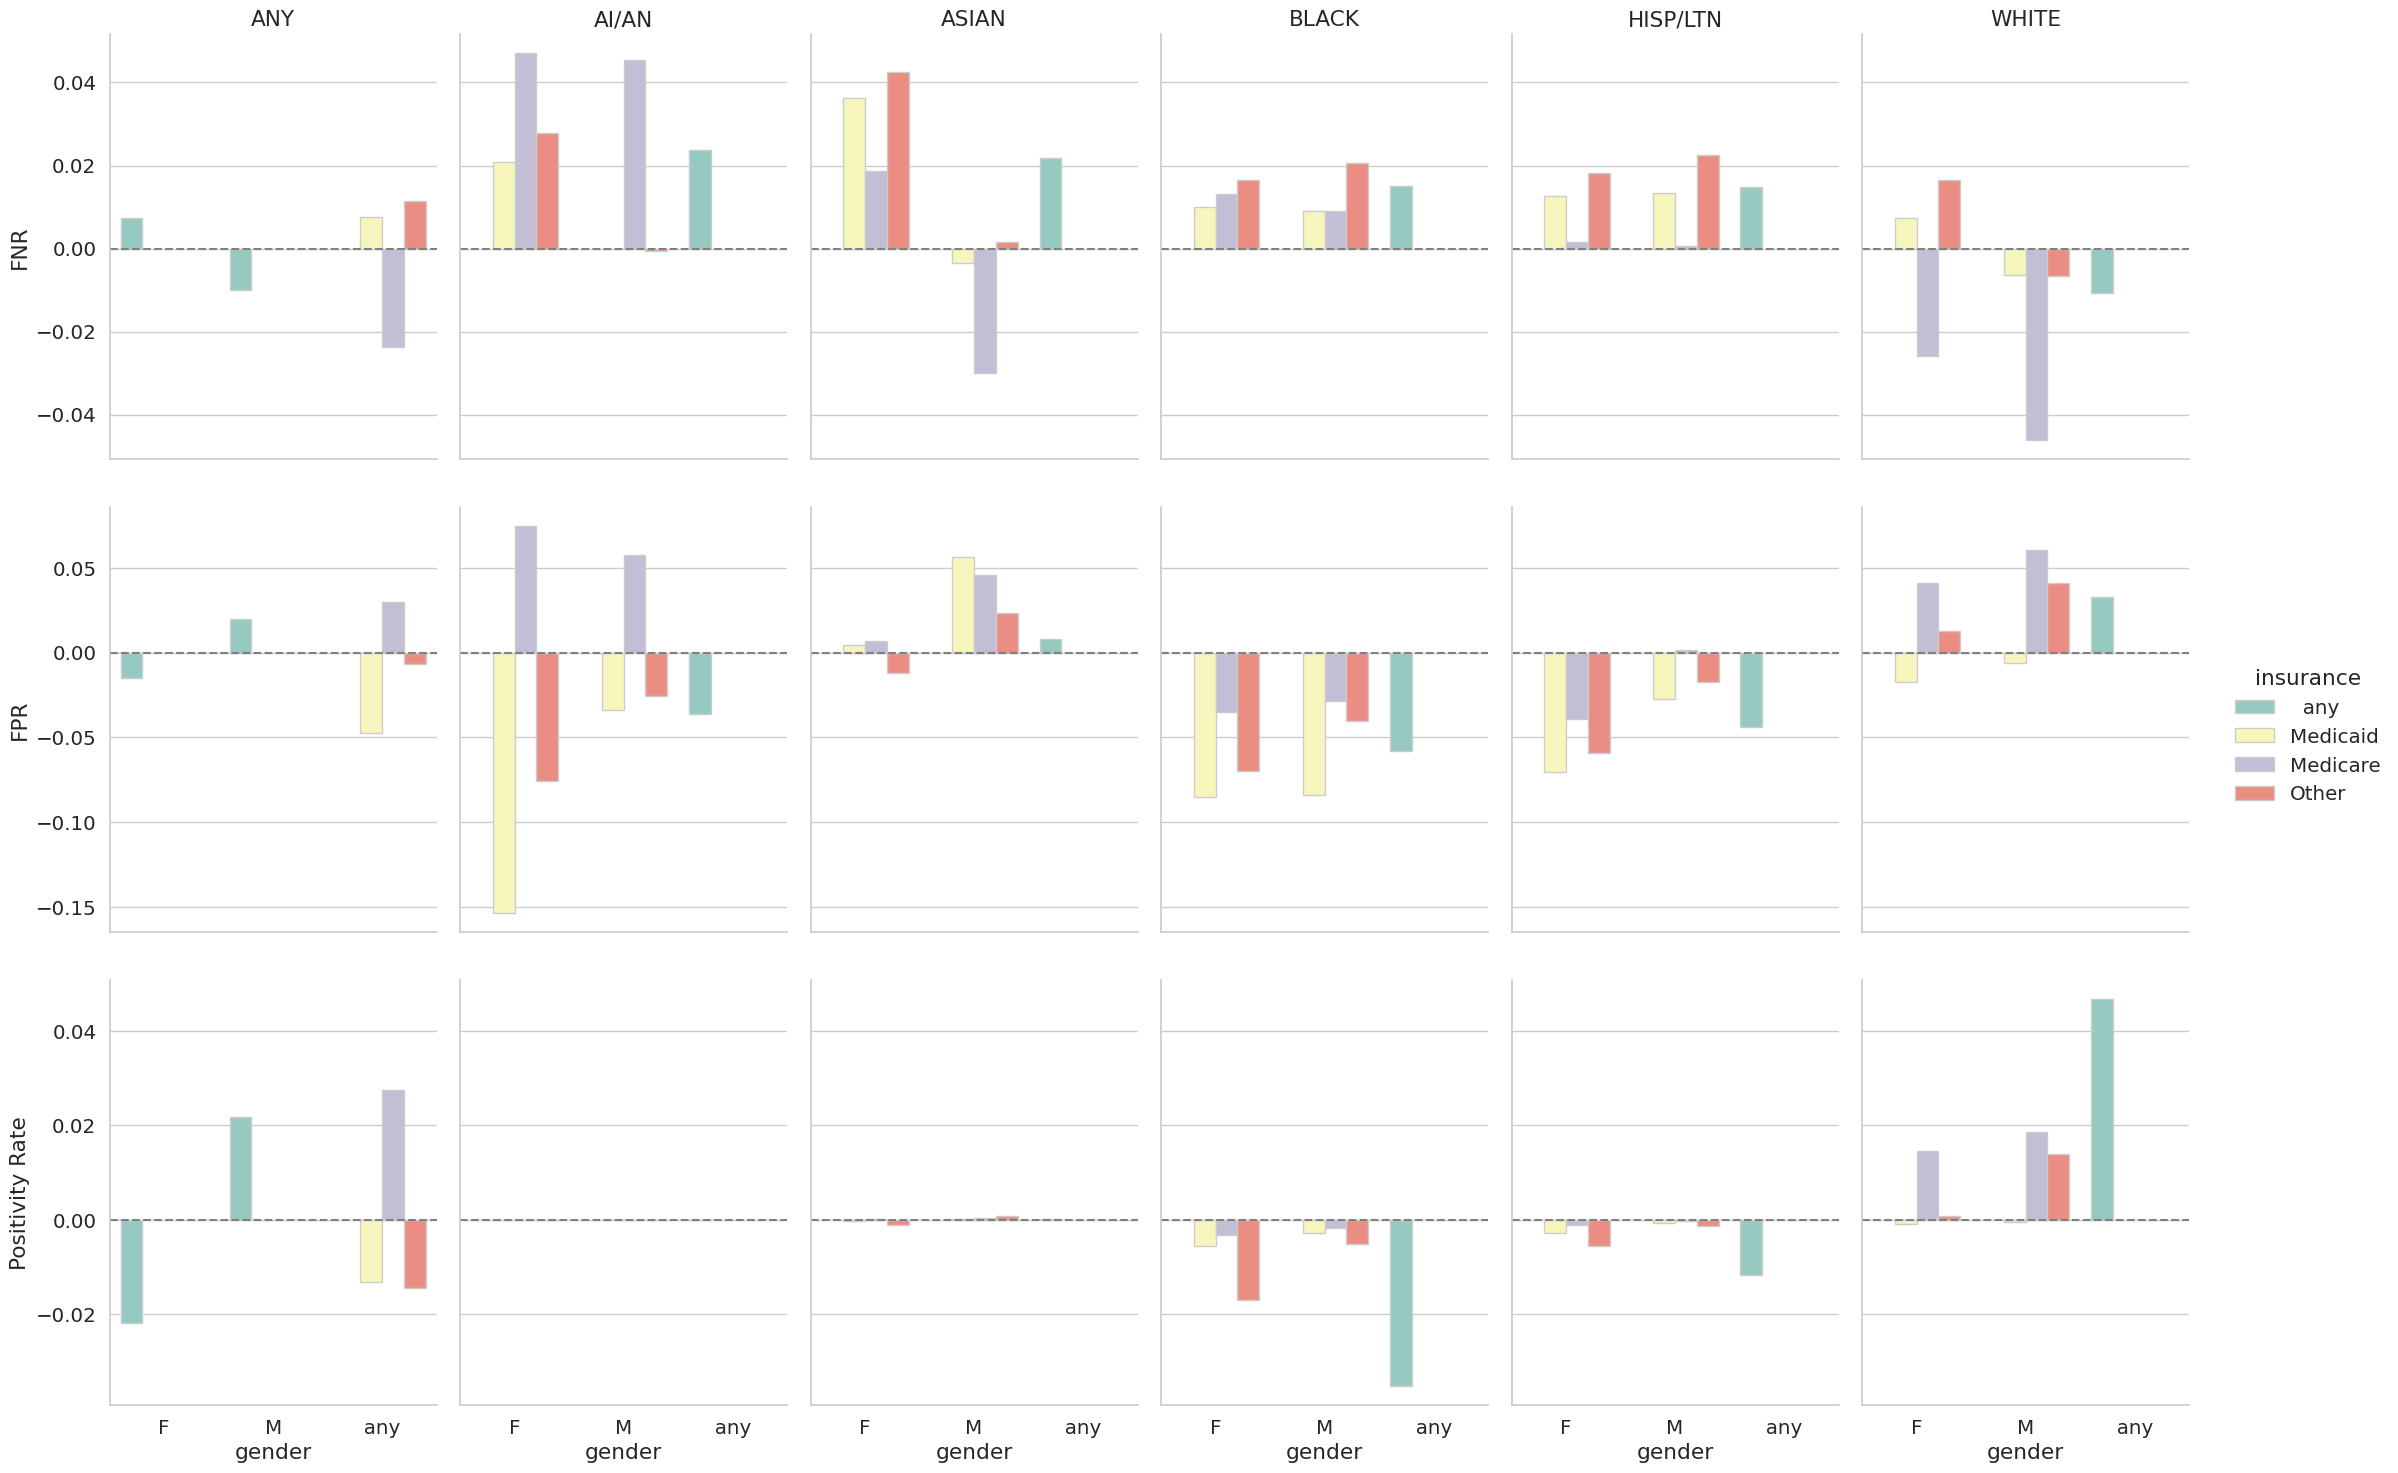

In [2]:
df_fairness = pd.read_csv('df_fairness.csv') 
df_plt = (df_fairness
          .melt(
              id_vars = ['insurance','ethnicity','gender']
          )
         )
df_plt = df_plt.loc[~df_plt.variable.str.contains('Brier')]          
df_fairness
import seaborn as sns
sns.set_theme(style='whitegrid',font_scale=1.3)

g = sns.catplot(
    kind='bar',
    edgecolor="0.8",
    data=df_plt,
    row='variable',
    col='ethnicity',
    x='gender',
    hue='insurance',
    y='value',
    sharey='row',
    aspect=0.75,
    palette='Set3'
)

g.refline(y=0)

# make titles nicer 

nice_cols = {
'AMERICAN INDIAN/ALASKA NATIVE':'AI/AN',
    'BLACK/AFRICAN AMERICAN':'BLACK',
    'HISPANIC/LATINO':'HISP/LTN',
    'WHITE':'WHITE',
    '  any  ':'ANY',
    'ASIAN':'ASIAN'
}
for (row,col),ax in g.axes_dict.items():
    if 'any' in col: 
        ax.set_ylabel(row)
    if row == 'FNR':
        ax.set_title(nice_cols[col])
    else:
        ax.set_title('')
        